# Portfolio Optimization: Markowitz and some financial statistic
#### By: Julián Durán
#### Linkedin: www.linkedin.com/in/juliangodu

### Packages

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.stats as scs

In [3]:
plt.style.use('ggplot')
%matplotlib inline

### Stocks

In [4]:
stocks_tickers = ['NVDA', 'TSLA', 'DIS', 'META', 'AMZN', 'MSFT']
start_date = '2019-01-01'
end_date = '2022-12-31'
num_simulations = 25000
risk_free_rate = 0

### Data gathering

In [5]:
data_stocks = yf.download(stocks_tickers,
                            start = start_date,
                            end = end_date,
                            progress = True,
                            auto_adjust = True)['Close']
n_stocks = len(stocks_tickers)

[*********************100%%**********************]  6 of 6 completed


In [6]:
data_stocks.info() #Checking existence of NA Data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2019-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1008 non-null   float64
 1   DIS     1008 non-null   float64
 2   META    1008 non-null   float64
 3   MSFT    1008 non-null   float64
 4   NVDA    1008 non-null   float64
 5   TSLA    1008 non-null   float64
dtypes: float64(6)
memory usage: 55.1 KB


In [7]:
data_stocks.head()

,AMZN,DIS,META,MSFT,NVDA,TSLA
Date,,,,,,
2019-01-02,76.956497,107.304619,135.679993,95.846024,33.790485,20.674667
2019-01-03,75.014000,104.704964,131.740005,92.320045,31.748957,20.024000
2019-01-04,78.769501,107.934837,137.949997,96.613785,33.783039,21.179333
2019-01-07,81.475502,108.870316,138.050003,96.736992,35.571533,22.330667
2019-01-08,82.829002,109.717178,142.529999,97.438400,34.685966,22.356667


Text(0, 0.5, 'Price - $USD')

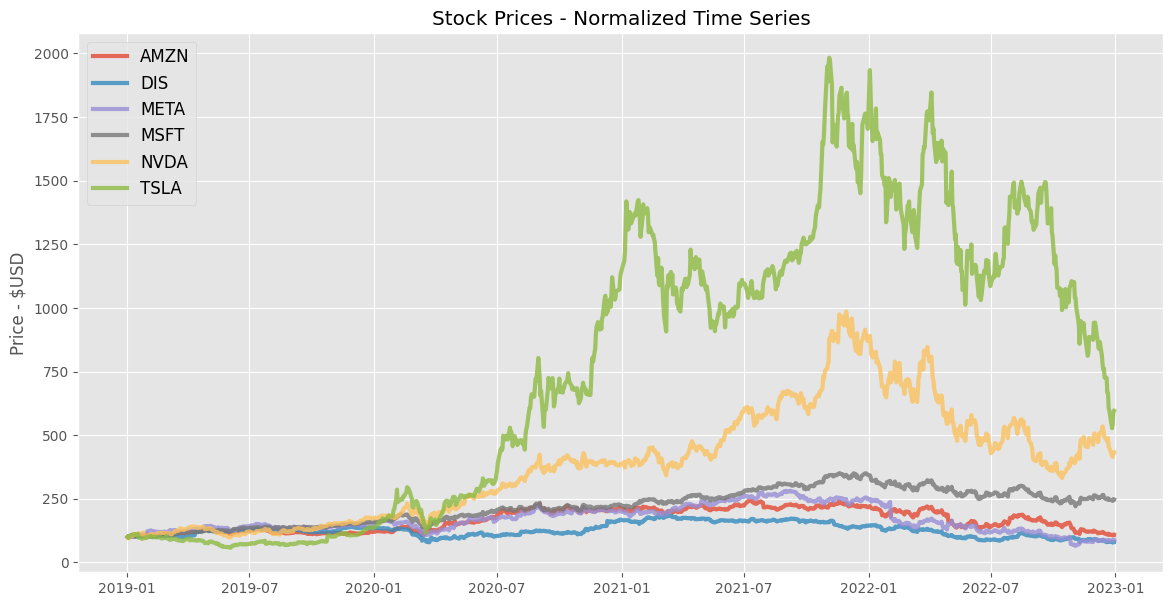

In [9]:
plt.figure(figsize=(14, 7))
for stock in data_stocks.columns.values:
    plt.plot(data_stocks.index, ((data_stocks[stock]/data_stocks[stock].iloc[0])*100), # Normalized Data
                lw=3,
                alpha=0.8,
                label=stock)
plt.legend(loc='upper left', fontsize=12)
plt.title('Stock Prices - Normalized Time Series')
plt.ylabel('Price - $USD')

In [10]:
# Log Returns
stock_log_returns = data_stocks.apply(np.log).diff().dropna()
stock_log_returns.head()

,AMZN,DIS,META,MSFT,NVDA,TSLA
Date,,,,,,
2019-01-03,-0.025566,-0.024525,-0.029469,-0.037482,-0.062319,-0.031978
2019-01-04,0.048851,0.030381,0.046061,0.045460,0.062099,0.056094
2019-01-07,0.033777,0.008630,0.000725,0.001274,0.051587,0.052935
2019-01-08,0.016476,0.007749,0.031937,0.007225,-0.025211,0.001164
2019-01-09,0.001713,0.011156,0.011857,0.014198,0.019476,0.009438


Text(0.5, 1.0, 'Logarithmic Returns - Stocks')

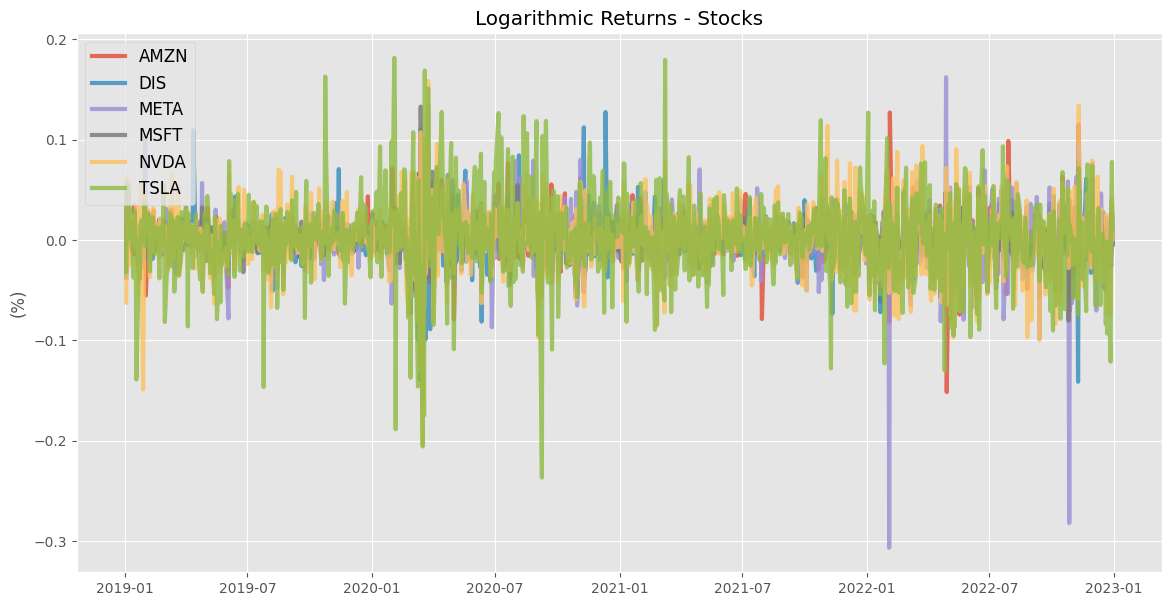

In [13]:
plt.figure(figsize=(14, 7))
for stock in stock_log_returns.columns.values:
    plt.plot(stock_log_returns.index, (stock_log_returns[stock]), # Normalized Data
                lw=3,
                alpha=0.8,
                label=stock)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('(%)')
plt.title('Logarithmic Returns - Stocks')

array([[<Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'META'}>,
        <Axes: title={'center': 'MSFT'}>],
       [<Axes: title={'center': 'NVDA'}>,
        <Axes: title={'center': 'TSLA'}>]], dtype=object)

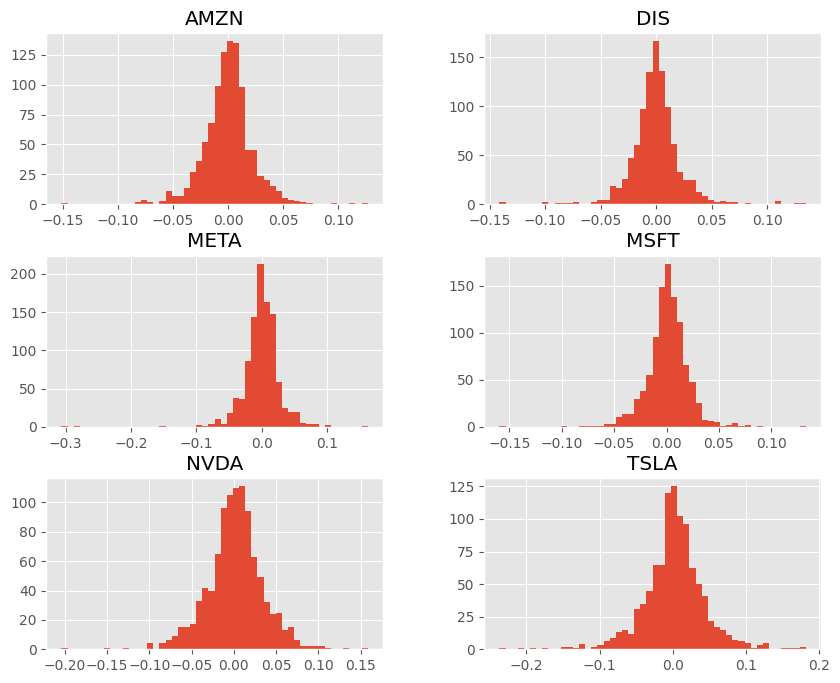

In [15]:
stock_log_returns.hist(bins=50, figsize=(10, 8))

### Statistics from each stock

In [16]:
def print_statistics(array):
    sta = scs.describe(array)
    print('%14s %15s' % ('Statistic','Value'))
    print(30*'-')
    print('%14s %15.5f' % ('Size', int(sta[0])))
    print('%14s %15.5f' % ('Min', sta[1][0]))
    print('%14s %15.5f' % ('Max', sta[1][1]))
    print('%14s %15.5f' % ('Mean', sta[2]))
    print('%14s %15.5f' % ('Std', sta[3]))
    print('%14s %15.5f' % ('Skewness', sta[4]))
    print('%14s %15.5f' % ('Kurtosis', sta[5]))            

In [18]:
# Descriptive Statistics
for stock in stocks_tickers:
    print('\nDescriptive Statistics for: {}'.format(stock))
    print(33*'-')
    stock_log_return = np.array(stock_log_returns[stock])
    print_statistics(stock_log_return)


Descriptive Statistics for: NVDA
---------------------------------
     Statistic           Value
------------------------------
          Size      1007.00000
           Min        -0.20398
           Max         0.15834
          Mean         0.00145
           Std         0.00110
      Skewness        -0.24831
      Kurtosis         2.79710

Descriptive Statistics for: TSLA
---------------------------------
     Statistic           Value
------------------------------
          Size      1007.00000
           Min        -0.23652
           Max         0.18145
          Mean         0.00177
           Std         0.00179
      Skewness        -0.26301
      Kurtosis         3.66978

Descriptive Statistics for: DIS
---------------------------------
     Statistic           Value
------------------------------
          Size      1007.00000
           Min        -0.14114
           Max         0.13464
          Mean        -0.00021
           Std         0.00049
      Skewness        

## Portfolio Optimization

In [19]:
# Annualized portfolio returns 
def portfolio_returns(weights):
    return(np.sum(stock_log_returns.mean() * weights) * 252)

# Annualized portfolio volatility (Standard deviation)
def portfolio_volatility(weights):
    return(np.sqrt(np.dot(weights.T, np.dot(stock_log_returns.cov()*252, weights))))

# Portfolio Sharpe Ratio
def portfolio_sharpe_ratio(risk_free_rate, weights):
    return (portfolio_returns(weights) - risk_free_rate)/(portfolio_volatility(weights))

In [20]:
def random_portfolios(num_simulations):
    pfl_rets = []
    pfl_volts = []
    pfl_sharpes = []

    for _ in range(num_simulations):
        # Simulation of Weights
        weights = np.random.random(n_stocks)
        weights /= np.sum(weights)
        # Annualized pfl returns and volatilities per simulation
        pfl_rets.append(portfolio_returns(weights))
        pfl_volts.append(portfolio_volatility(weights))
        pfl_sharpes.append(portfolio_sharpe_ratio(risk_free_rate, weights))
        
    pfl_rets = np.array(pfl_rets)
    pfl_volts = np.array(pfl_volts)
    pfl_sharpes = np.array(pfl_sharpes)
    return(pfl_rets, pfl_volts, pfl_sharpes)

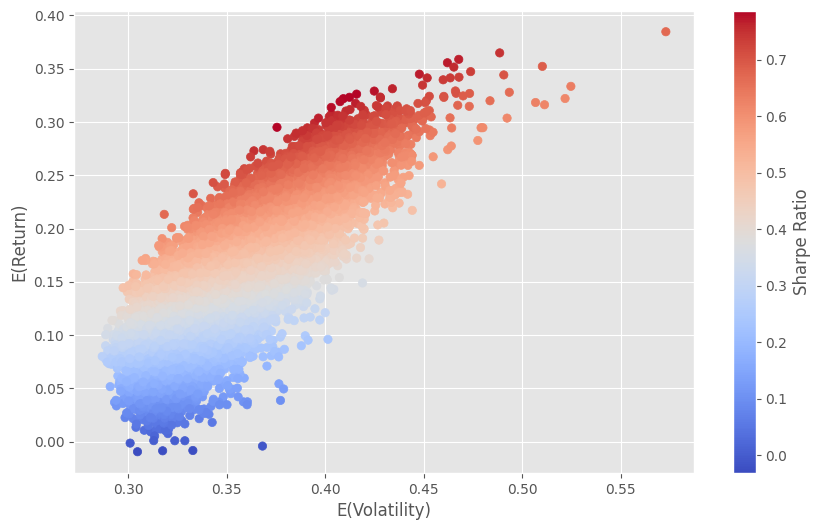

In [21]:
portfolios_simulations = random_portfolios(num_simulations)

# Random portfolios simulation plot
plt.figure(figsize=(10,6))
plt.scatter(portfolios_simulations[1], portfolios_simulations[0],
            c = portfolios_simulations[2], marker = 'o', cmap = 'coolwarm')
plt.xlabel('E(Volatility)')
plt.ylabel('E(Return)')
plt.colorbar(label = 'Sharpe Ratio')

### Optimization: Max Sharpe Ratio

In [22]:
# Scipy optimizer
import scipy.optimize as sco
# Equally n_stocks weighted tuple on a list
initial_weights = np.array(n_stocks * [1 / n_stocks,])

In [23]:
def portfolio_optimization_sharpe(risk_free_rate, initial_weights):
    ### Maximum Sharpe Ratio
    
    # Function to maximize: -Sharpe Ratio (Minimize)
    def min_func_sharpe(weights):
        return (-(portfolio_returns(weights) - risk_free_rate) / portfolio_volatility(weights))
    # Constraint: Weights should equal one
    constraint = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1})
    # Weight allocation per stock (No shorts allowed)
    parameters_bounds = tuple((0,1) for x in range(n_stocks))
    
    # Optimization: Maximum Sharpe Ratio
    opts_sharpe = sco.minimize(min_func_sharpe, initial_weights,
                            method = 'SLSQP', bounds = parameters_bounds,
                            constraints = constraint)
    opti_results = opts_sharpe['x'].round(3)
    
    # Optimal portfolio by Sharpe Ratio
    optimum_portfolio_sharpe = []
    # Optimal Weights
    optimum_portfolio_sharpe.append([np.array(opti_results)])
    # Portfolio Return
    optimum_portfolio_sharpe.append(portfolio_returns(opti_results).round(3))
    # Portfolio Volatility 
    optimum_portfolio_sharpe.append(portfolio_volatility(opti_results).round(3))
    # Portfolio Max Sharpe Ratio
    optimum_portfolio_sharpe.append(portfolio_sharpe_ratio(risk_free_rate, opti_results))
    return(optimum_portfolio_sharpe)

In [24]:
portfolio_sharpe = portfolio_optimization_sharpe(risk_free_rate, initial_weights)
print(portfolio_sharpe)

### Volatility minimization

In [25]:
def portfolio_optimization_volatility(risk_free_rate, initial_weights):
    ### Minimum Volatility
    # Constraint: Weights should equal one
    constraint = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1})
    # Weight allocation per stock (No shorts allowed)
    parameters_bounds = tuple((0,1) for x in range(n_stocks))
    # Equally n_stocks weighted tuple on a list
    initial_weights = np.array(n_stocks * [1 / n_stocks,])
    
    # Optimization: Maximum Sharpe Ratio
    opts_volat = sco.minimize(portfolio_volatility, initial_weights,
                            method = 'SLSQP', bounds = parameters_bounds,
                            constraints = constraint)
    opti_results = opts_volat['x'].round(3)

    # Optimal portfolio by Sharpe Ratio
    min_portfolio_volat = []
    # Optimal Weights
    min_portfolio_volat.append([np.array(opti_results)])
    # Portfolio Return
    min_portfolio_volat.append(portfolio_returns(opti_results).round(3))
    # Portfolio Volatility 
    min_portfolio_volat.append(portfolio_volatility(opti_results).round(3))
    # Portfolio Max Sharpe Ratio
    min_portfolio_volat.append(portfolio_sharpe_ratio(risk_free_rate, opti_results))
    return(min_portfolio_volat)

In [26]:
portfolio_minvol = portfolio_optimization_volatility(risk_free_rate, initial_weights)
print(portfolio_minvol)

[[array([0.21 , 0.363, 0.   , 0.427, 0.   , 0.   ])], 0.082, 0.285, 0.28777674632724515]


### Returns Maximization


In [27]:
def portfolio_optimization_return(risk_free_rate, initial_weights):
    ### Maximum Returns
    def max_pfl_ret(weights):
        return(-(np.sum(stock_log_returns.mean() * weights) * 252))
    # Constraint: Weights should equal one
    constraint = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1})
    # Weight allocation per stock (No shorts allowed)
    parameters_bounds = tuple((0,1) for x in range(n_stocks))
    # Equally n_stocks weighted tuple on a list
    initial_weights = np.array(n_stocks * [1 / n_stocks,])
    
    # Optimization: Maximum Sharpe Ratio
    opts_ret = sco.minimize(max_pfl_ret, initial_weights,
                            method = 'SLSQP', bounds = parameters_bounds,
                            constraints = constraint)
    opti_results = opts_ret['x'].round(3)

    # Optimal portfolio by Sharpe Ratio
    max_portfolio_ret = []
    # Optimal Weights
    max_portfolio_ret.append([np.array(opti_results)])
    # Portfolio Return
    max_portfolio_ret.append(portfolio_returns(opti_results).round(3))
    # Portfolio Volatility 
    max_portfolio_ret.append(portfolio_volatility(opti_results).round(3))
    # Portfolio Max Sharpe Ratio
    max_portfolio_ret.append(portfolio_sharpe_ratio(risk_free_rate, opti_results))
    return(max_portfolio_ret)

In [28]:
portfolio_maxret = portfolio_optimization_return(risk_free_rate, initial_weights)
print(portfolio_maxret)

[[array([0., 0., 0., 0., 0., 1.])], 0.447, 0.671, 0.6651730768961058]


### Efficient Frontier

In [29]:
def efficient_frontier(portfolio_minvol, portfolio_sharpe, initial_weights, target_returns):
    #Constraints for optimization
    constraint = ({'type':'eq', 'fun':lambda x: portfolio_returns(x) - target_return},
                    {'type':'eq', 'fun':lambda x: np.sum(x) - 1})
    bound = tuple((0,1) for x in initial_weights)
    # Target vols
    target_vols = []

    #Optimization per target returns
    for target_return in target_returns:
        constraint[0]['fun'] = lambda x: portfolio_returns(x) - target_return
        res = sco.minimize(portfolio_volatility, initial_weights, method = 'SLSQP',
                            bounds = bound, constraints = constraint)
        target_vols.append(res['fun'])
    #Target Vols
    target_vols = np.array(target_vols)
    
    # Max Sharpe Asset Allocation
    max_sharpe_allocation = pd.DataFrame(portfolio_sharpe[0],
                                                columns = stocks_tickers,
                                                index = ['Allocation'])
    max_sharpe_allocation.loc['Allocation'] = (round(max_sharpe_allocation.loc['Allocation']*100, 2))
    
    # Min Vol Asset Allocation
    min_vol_allocation = pd.DataFrame(portfolio_minvol[0],
                                      columns = stocks_tickers,
                                      index = ['Allocation'])
    min_vol_allocation.loc['Allocation'] = (round(min_vol_allocation.loc['Allocation']*100, 2))
    
    ### Asset Allocation
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(portfolio_sharpe[1],2))
    print ("Annualised Volatility:", round(portfolio_sharpe[2],2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(portfolio_minvol[1],2))
    print ("Annualised Volatility:", round(portfolio_minvol[2],2))
    print ("\n")
    print (min_vol_allocation)
    
    ### Plotting the efficient frontier
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolios_simulations[1], portfolios_simulations[0],
                c = portfolios_simulations[2], marker='.', alpha=0.8, cmap='coolwarm')
    plt.plot(target_vols, target_returns, linestyle='-.', color = 'black', lw=4.0, label = "Efficient Frontier")
    plt.plot(portfolio_minvol[2],
            portfolio_minvol[1],
            'g*', markersize=20.0, label = "Minimum Volatility")
    plt.plot(portfolio_sharpe[2],
            portfolio_sharpe[1],
            'r*', markersize=20.0, label = "Maximum Sharpe Ratio")
    # Detailing
    plt.xlabel('E(Volatility)')
    plt.ylabel('E(Return)')
    plt.colorbar(label='Sharpe ratio')
    plt.legend(labelspacing=0.8)
    plt.show()

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.31
Annualised Volatility: 0.38


            NVDA  TSLA  DIS  META  AMZN  MSFT
Allocation   0.0   0.0  0.0  53.6  20.9  25.5
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.08
Annualised Volatility: 0.28


            NVDA  TSLA  DIS  META  AMZN  MSFT
Allocation  21.0  36.3  0.0  42.7   0.0   0.0


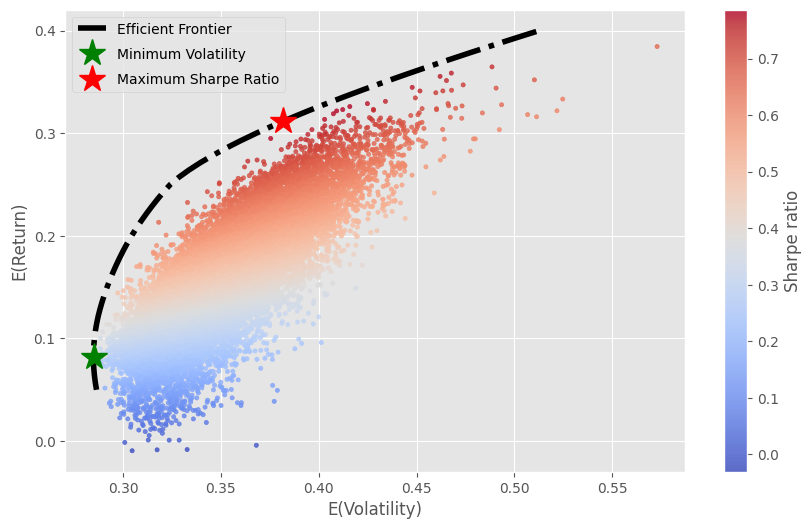

In [30]:
target_returns = np.linspace(0.05, 0.4, 50)
efficient_frontier(portfolio_minvol, portfolio_sharpe, initial_weights, target_returns)